In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"D:\MLAI\dataset\diabetes.csv")

In [4]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [5]:
data.shape

(768, 9)

In [18]:
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [19]:
Data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
x=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

# Data is imbalance 

In [21]:
# Data balance by using RandomOver sampling technique

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE()
x_data,y_data=sm.fit_resample(x,y)
print(Counter(y_data))

Counter({1: 500, 0: 500})


# split data into train and test


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=100)


In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
# Create Decision Tree classifer object
dt= DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=100)
# Train Decision Tree Classifer
dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [28]:
#predict the response for test dataset
y_pred=dt.predict(x_test)

#model Accuracy,how often is the classifier correct
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.745


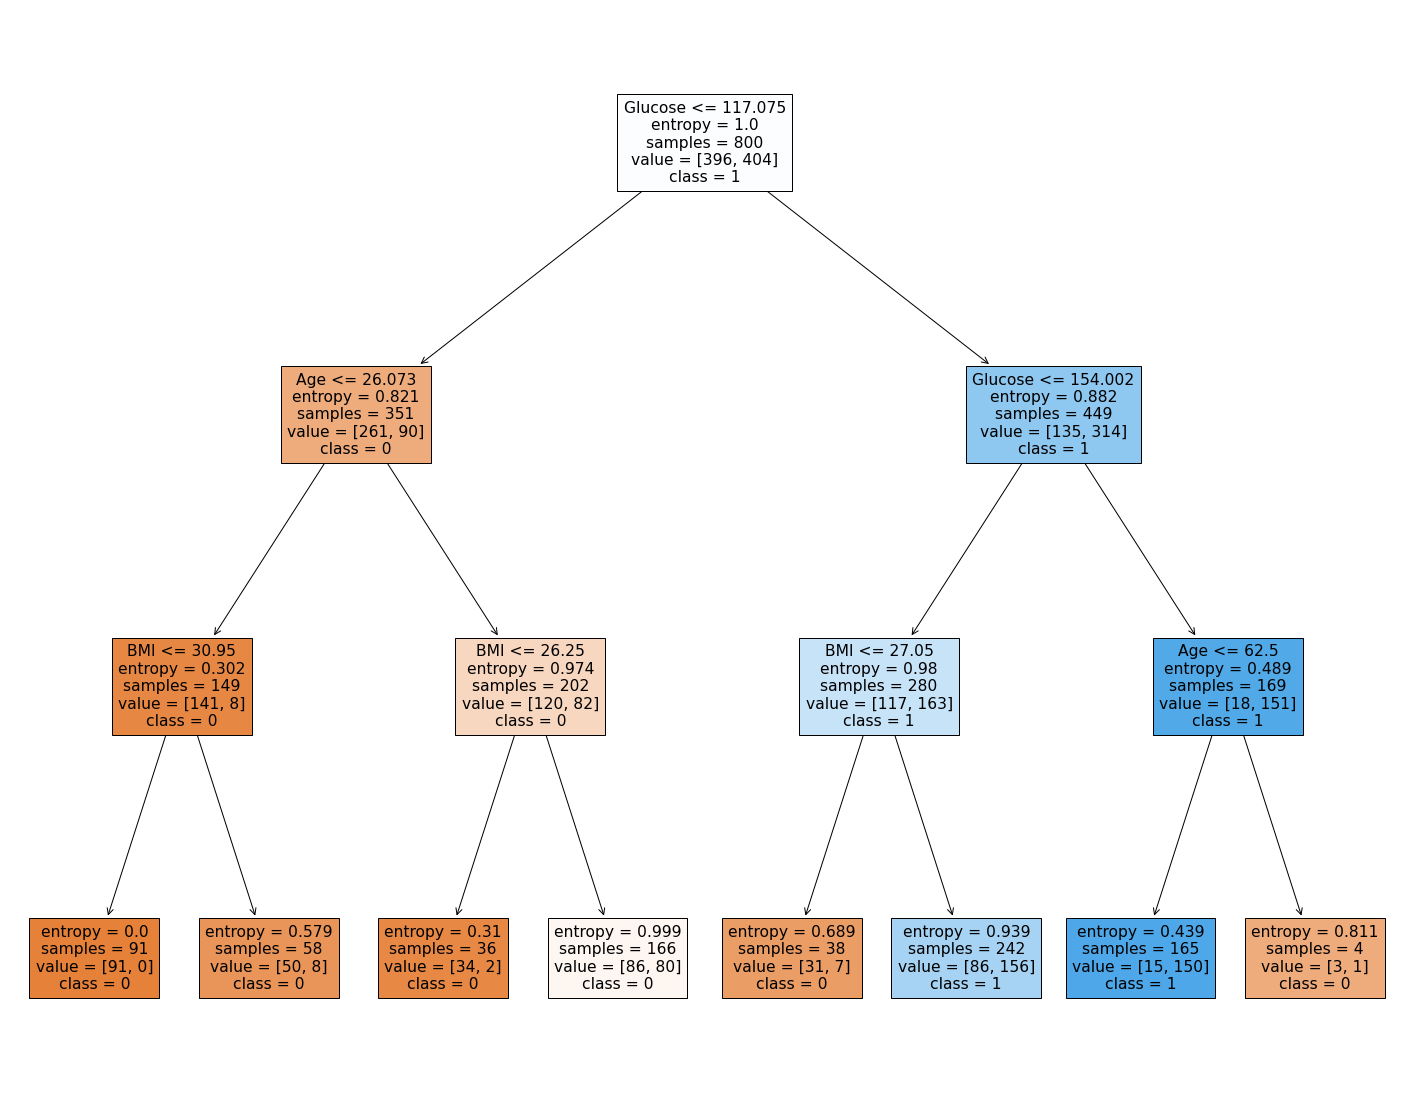

In [29]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

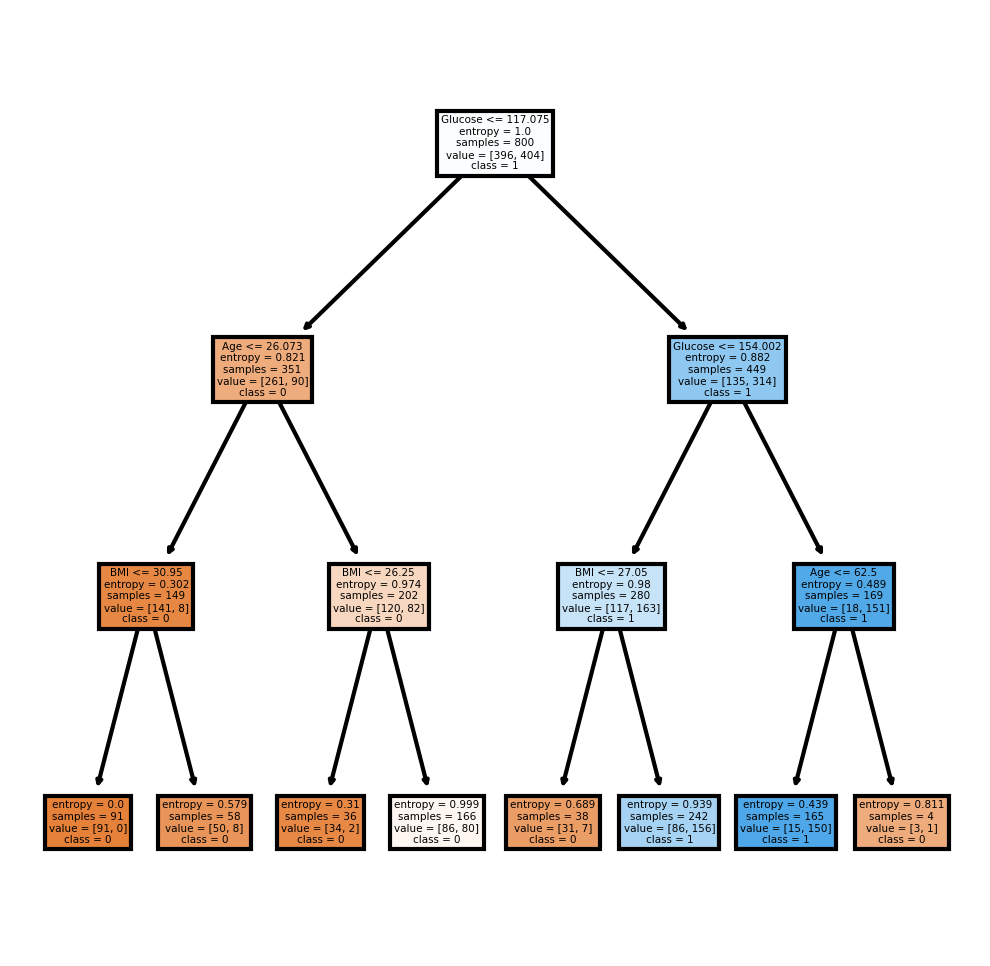

In [30]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt,
           feature_names = feature_cols , 
           class_names=['0','1'],
           filled = True);

In [31]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 117.07
|   |--- feature_7 <= 26.07
|   |   |--- feature_5 <= 30.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  30.95
|   |   |   |--- class: 0
|   |--- feature_7 >  26.07
|   |   |--- feature_5 <= 26.25
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.25
|   |   |   |--- class: 0
|--- feature_1 >  117.07
|   |--- feature_1 <= 154.00
|   |   |--- feature_5 <= 27.05
|   |   |   |--- class: 0
|   |   |--- feature_5 >  27.05
|   |   |   |--- class: 1
|   |--- feature_1 >  154.00
|   |   |--- feature_7 <= 62.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  62.50
|   |   |   |--- class: 0

